# Day 11

- [https://adventofcode.com/2019/day/11](https://adventofcode.com/2019/day/11)

```text
--- Day 11: Space Police ---

On the way to Jupiter, you're pulled over by the Space Police.

"Attention, unmarked spacecraft! You are in violation of Space Law! All spacecraft must have a clearly visible registration identifier! You have 24 hours to comply or be sent to Space Jail!"

Not wanting to be sent to Space Jail, you radio back to the Elves on Earth for help. Although it takes almost three hours for their reply signal to reach you, they send instructions for how to power up the emergency hull painting robot and even provide a small Intcode program (your puzzle input) that will cause it to paint your ship appropriately.

There's just one problem: you don't have an emergency hull painting robot.

You'll need to build a new emergency hull painting robot. The robot needs to be able to move around on the grid of square panels on the side of your ship, detect the color of its current panel, and paint its current panel black or white. (All of the panels are currently black.)

The Intcode program will serve as the brain of the robot. The program uses input instructions to access the robot's camera: provide 0 if the robot is over a black panel or 1 if the robot is over a white panel. Then, the program will output two values:

    First, it will output a value indicating the color to paint the panel the robot is over: 0 means to paint the panel black, and 1 means to paint the panel white.
    Second, it will output a value indicating the direction the robot should turn: 0 means it should turn left 90 degrees, and 1 means it should turn right 90 degrees.

After the robot turns, it should always move forward exactly one panel. The robot starts facing up.

The robot will continue running for a while like this and halt when it is finished drawing. Do not restart the Intcode computer inside the robot during this process.

For example, suppose the robot is about to start running. Drawing black panels as ., white panels as #, and the robot pointing the direction it is facing (< ^ > v), the initial state and region near the robot looks like this:

.....
.....
..^..
.....
.....

The panel under the robot (not visible here because a ^ is shown instead) is also black, and so any input instructions at this point should be provided 0. Suppose the robot eventually outputs 1 (paint white) and then 0 (turn left). After taking these actions and moving forward one panel, the region now looks like this:

.....
.....
.<#..
.....
.....

Input instructions should still be provided 0. Next, the robot might output 0 (paint black) and then 0 (turn left):

.....
.....
..#..
.v...
.....

After more outputs (1,0, 1,0):

.....
.....
..^..
.##..
.....

The robot is now back where it started, but because it is now on a white panel, input instructions should be provided 1. After several more outputs (0,1, 1,0, 1,0), the area looks like this:

.....
..<#.
...#.
.##..
.....

Before you deploy the robot, you should probably have an estimate of the area it will cover: specifically, you need to know the number of panels it paints at least once, regardless of color. In the example above, the robot painted 6 panels at least once. (It painted its starting panel twice, but that panel is still only counted once; it also never painted the panel it ended on.)

Build a new emergency hull painting robot and run the Intcode program on it. How many panels does it paint at least once?

```

In [1]:
# Python imports
import matplotlib.pyplot as plt
import numpy as np

from aoc2019.robot import Robot

## Challenge Part 1

- Puzzle input obtained from [https://adventofcode.com/2019/day/11](https://adventofcode.com/2019/day/11)

In [2]:
# Define surface
surface = np.zeros((11, 11), np.int32)
surface

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [3]:
# Load Intcode
with open("day11.txt", "r") as ifh:
    program = ifh.read().strip()
    
# Instantiate robot in centre of surface
surfsize = 101
centpos = int((surfsize - 1) * 0.5)
surface = np.zeros((surfsize, surfsize), np.int32)
robot = Robot(curpos=(centpos, centpos))
robot.program(program)

Robot visited 1894 panels.


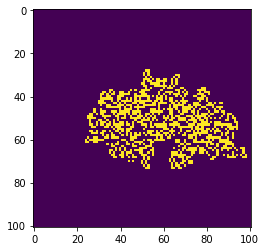

In [4]:
# Have robot paint surface
painted = robot.start(surface)

plt.imshow(painted);

# Get number of panels visited
print(f"Robot visited {len(robot._visited)} panels.")

## Challenge Part 2

```text
You're not sure what it's trying to paint, but it's definitely not a registration identifier. The Space Police are getting impatient.

Checking your external ship cameras again, you notice a white panel marked "emergency hull painting robot starting panel". The rest of the panels are still black, but it looks like the robot was expecting to start on a white panel, not a black one.

Based on the Space Law Space Brochure that the Space Police attached to one of your windows, a valid registration identifier is always eight capital letters. After starting the robot on a single white panel instead, what registration identifier does it paint on your hull?
```

In [5]:
# Instantiate robot in centre of surface
surfsize = 91
centpos = int((surfsize - 1) * 0.5)
surface = np.zeros((surfsize, surfsize), np.int32)
surface[centpos, centpos] = 1  # Make starting panel white
robot = Robot(curpos=(centpos, centpos))
robot.program(program)

# Have robot paint surface
painted = robot.start(surface)

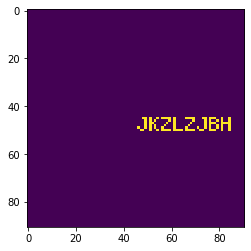

In [6]:
plt.imshow(painted);